In [2]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer,make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from math import *
from plotnine import *

## The Data

At this link, you will find a dataset containing information about heart disease patients: https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1

A description of the original dataset can be found here: https://archive.ics.uci.edu/dataset/45/heart+disease (However, this dataset has been cleaned and reduced, and the people have been given fictious names.)

## 1. Logistic Regression

Fit a Logistic Regression using only `age` and `chol` (cholesterol) as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

How high for the doctors to estimate a 90% chance that heart disease is present?

In [3]:
hd = pd.read_csv("https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1")
hd

,Name,age,sex,cp,trtbps,chol,restecg,thalach,diagnosis
0,Magnolia Cassin,60,1,1,117,230,1,160,No Disease
1,Dr. Cathern Heathcote,60,0,3,102,318,1,160,Disease
2,Miles Wolf,62,0,3,130,263,1,97,No Disease
3,Mikaila Block,43,1,1,115,303,1,181,Disease
4,Mrs. Jacquline Marquardt,66,1,1,120,302,0,151,Disease
...,...,...,...,...,...,...,...,...,...
199,Bridgett Franecki,55,0,1,128,205,2,130,No Disease
200,Mr. Foster Zieme,51,1,3,94,227,1,154,Disease
201,Lashanda Hagenes,42,1,2,120,295,1,162,Disease
202,Levern Trantow III,35,0,1,138,183,1,182,Disease


In [4]:
X = hd.drop("diagnosis", axis = 1)

y = hd['diagnosis']


In [5]:
ct = ColumnTransformer(
  [(("keep", FunctionTransformer(lambda x: x), ["age", "chol"]))
  ],
  remainder = "drop"
)

In [6]:
pipeline1 = Pipeline(
    [("preprocessing", ct),
  ("log_regression", LogisticRegression())]
)


In [41]:
fitlg = pipeline1.fit(X, y)

interceptlg = fitlg.named_steps['log_regression'].intercept_

interceptlg

array([-3.24011226])

In [42]:
coeflg = fitlg.named_steps['log_regression'].coef_

coeflg

array([[0.04686331, 0.00180124]])

z = 0.047age + 0.001chol - 3.24

In [9]:
(0.04686331*55-3.24011226)/(-0.00180124)

367.87446980968673

In [10]:
# when z is 0
0.047*55-3.24
-0.6550000000000002/0.001

# when we solve for z with p = 90%

z = log(.9/.1)
((z + 3.24) - (0.047*55))/0.001

2852.22457733622

655

2852.224

## 2. Linear Discriminant Analysis

Fit an LDA model using only `age` and `chol` (cholesterol)  as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [11]:
pipelinelda = Pipeline(
    [("preprocessing", ct),
  ("lda", LinearDiscriminantAnalysis())]
)

In [12]:
fitlda = pipelinelda.fit(X, y)

interceptlda = fitlda.named_steps['lda'].intercept_

interceptlda

array([-3.21967766])

In [23]:
coef = fitlda.named_steps['lda'].coef_

coef

0 = 0.0465age + 0.00178chol -3.2196

In [14]:
(0.047*55-3.2196)/(-.001)



634.5999999999998

634.5999

the cutoff value for a 55 yo is 634 when z is 0 which is 50% probability

## 3. Support Vector Classifier

Fit an SVC model using only `age` and `chol` as predictors.  Don't forget to tune the regularization parameter.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [15]:
pipelinesvc = Pipeline(
    [("preprocessing", ct),
  ("svc", SVC(kernel='linear'))]
)

In [16]:
fitsvc = pipelinesvc.fit(X, y)

interceptsvc = fitsvc.named_steps['svc'].intercept_

interceptsvc

array([-4.68603406])

In [58]:
coefsvc = fitsvc.named_steps['svc'].coef_

coefsvc

array([[0.06439772, 0.00365896]])

0 = 0.064age + 0.003chol -4.686

In [18]:
(0.06439772*55-4.68603406)/(-0.00365896)

312.70072916894406

312.7

In [32]:
# Why does this not work?

coefsvc1 = 0.06439772
coefsvc2 = 0.00365896

interceptsvc_plot = interceptsvc/coefsvc2
slopesvc = (-coefsvc1/coefsvc2)

coeflda1 = 0.04655744
coeflda2 = 0.00178967

interceptlda_plot = interceptlda/coeflda2
slopelda = (-coeflda1/coeflda2)

## 4. Comparing Decision Boundaries

Make a scatterplot of `age` and `chol`, coloring the points by their true disease outcome.  Add a line to the plot representing the **linear separator** (aka **decision boundary**) for each of the three models above.

In [49]:
slope1 = -fitsvc.named_steps['svc'].coef_[0][0] / fitsvc.named_steps['svc'].coef_[0][1]
intercept1 = -fitsvc.named_steps['svc'].intercept_ / fitsvc.named_steps['svc'].coef_[0][1]

slope2 = -fitlda.named_steps['lda'].coef_[0][0]/ fitlda.named_steps['lda'].coef_[0][1]
intercept2 = -fitlda.named_steps['lda'].intercept_ / fitlda.named_steps['lda'].coef_[0][1]

slope3 = -fitlg.named_steps['log_regression'].coef_[0][0]/ fitlg.named_steps['log_regression'].coef_[0][1]
intercept3 = -fitlg.named_steps['log_regression'].intercept_ / fitlg.named_steps['log_regression'].coef_[0][1]

chol = (interceptsvc - age*coefsvc1)/coefsvc2

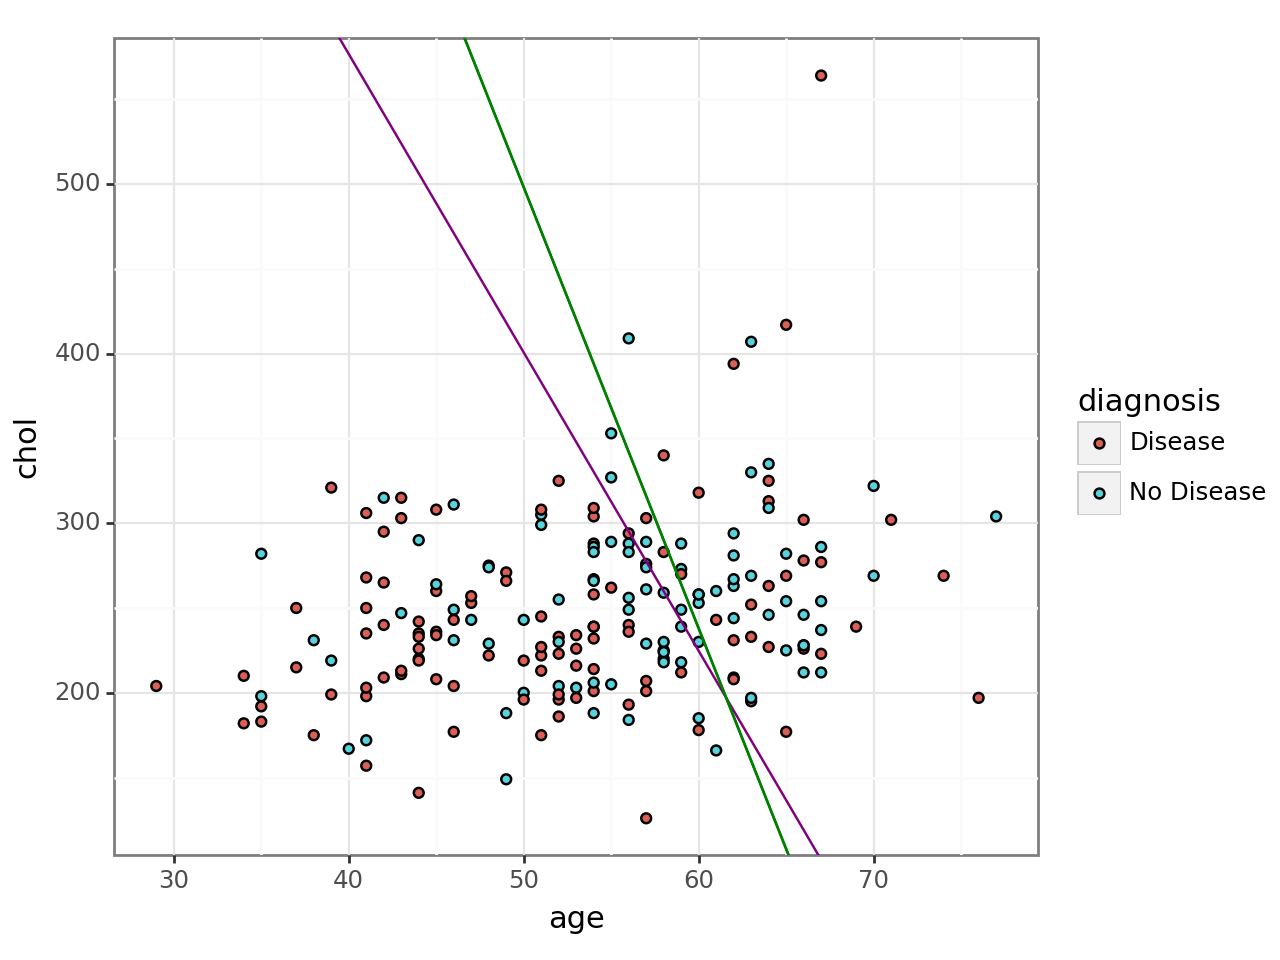

<Figure Size: (640 x 480)>

In [59]:
(ggplot(hd, aes(x='age', y = 'chol', fill = 'diagnosis'))
+ geom_point()
+ geom_abline(intercept=intercept1, slope=slope1, linetype='solid', color = 'purple')
+ geom_abline(intercept=intercept2, slope=slope2, linetype='solid', color = 'green' )
+ geom_abline(intercept=intercept3, slope=slope3, linetype='solid', color = 'green' )
+ theme_bw()
)